In [1]:
import numpy as np
from twobessel import *
import matplotlib.pyplot as plt
import cambPK 

In [2]:
%run cambPK.py

In [3]:
cambPK.pk_out

array([[1.00000000e-04, 3.40376513e+02],
       [1.00078279e-04, 3.40633924e+02],
       [1.00156619e-04, 3.40891530e+02],
       ...,
       [2.49609065e-01, 1.66115721e+03],
       [2.49804456e-01, 1.65922259e+03],
       [2.50000000e-01, 1.65729517e+03]])

# Cosmic variance

In [4]:
k, pk = np.loadtxt('Pkz0.0.dat', usecols=(0, 1), unpack=True)

# Get the logk-spacing
dlnk = np.log(k[1]/k[0])

N = k.size
print('Number of data points: '+str(N))

ell1 = 0
ell2 = 0
nu = 1.01

# Define the input 'kernel'. It has to be a matri: transform the pk to a diagonal matrix
pk1k2 = np.diag(k**3 * pk**2 / dlnk)

Number of data points: 10000


In [5]:
# Define the class for spherical Bessel 

sph_bessel = two_sph_bessel(k, k, pk1k2, nu1=nu, nu2=nu,  N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=0)

r1, r2, Fr1Fr2 = sph_bessel.two_sph_bessel(ell1, ell2)

10000 10000
(10000, 10000)
10000 10000


In [6]:
# Drop results above 200 Mpc/h

criterion = r1 <= 200

d1 = r1[criterion]
d2 = r2[criterion]

var_00 = Fr1Fr2[:len(d1), :len(d2)]

In [7]:
d1

array([  4.        ,   4.00313116,   4.00626476, ..., 199.609141  ,
       199.76539285, 199.92176702])

In [8]:
np.shape(var_00)

(5000, 5000)

In [9]:
np.shape(Fr1Fr2)

(10000, 10000)

In [10]:
from scipy.interpolate import RectBivariateSpline

# Create an interpolation function
f = RectBivariateSpline(d1, d2, var_00, kx=5, ky=5)

# Now you can call f with new r1 and r2 values to get an interpolated Fr1r2 value
r1_new = 20.  # replace with your desired r1 value
r2_new = 20.  # replace with your desired r2 value
Fr1r2_new = f(r1_new, r2_new)

In [11]:
Fr1r2_new

array([[55047.82332293]])

In [12]:
d1[325]

5.1582701816003915

In [13]:
var_00[325, 325] / (2*np.pi**2)

30770.960186037722

In [14]:
d = np.arange(4, 175, 4)

d

array([  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,  52,
        56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104,
       108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156,
       160, 164, 168, 172])

In [15]:
f(20, 20) / (2*np.pi**2), f(4,4)/ (2*np.pi**2)

(array([[2788.75530801]]), array([[48915.38454575]]))

In [16]:
var_00_172 = f(d, d)

In [17]:
np.shape(var_00_172)

(43, 43)

In [18]:
Omm=0.3111	 
Omb=0.0490	 
h=0.677	 
ns=0.9665	 
Acamb=2.105e-09

In [19]:
Omm*h**2, Omb*h**2

(0.1425861519, 0.022458121000000004)

In [20]:
np.diag(var_00_172)

array([9.65550989e+05, 2.80480212e+05, 1.39043322e+05, 8.15283134e+04,
       5.50478233e+04, 3.88111727e+04, 2.85477891e+04, 2.09419635e+04,
       1.72322390e+04, 1.31370706e+04, 1.05040633e+04, 8.81094567e+03,
       7.72709179e+03, 6.23781332e+03, 5.49319362e+03, 4.55803175e+03,
       4.02025598e+03, 3.52012773e+03, 3.10678689e+03, 2.58040706e+03,
       2.39248303e+03, 2.07899491e+03, 1.91541814e+03, 1.64891935e+03,
       1.51185815e+03, 1.39837359e+03, 1.29799929e+03, 1.13938242e+03,
       1.05777204e+03, 9.79179666e+02, 9.00508284e+02, 8.58718765e+02,
       7.79081471e+02, 7.32022387e+02, 6.87809260e+02, 6.45898747e+02,
       6.08600488e+02, 5.77136150e+02, 5.50650437e+02, 5.11831892e+02,
       4.91418260e+02, 4.60011830e+02, 4.39397111e+02])

In [21]:
varcosmic_mono_ = np.loadtxt('varcosmic_mono_bare.dat', skiprows=3)

In [22]:
varcosmic_mono_[1,1], var_00_172[0,0]/(2*np.pi**2)

(6679.41, 48915.38454575319)

In [23]:
varcosmic_mono_[0,:], varcosmic_mono_[:,0]

(array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.]))

In [24]:
varcosmic_mono = varcosmic_mono_[1:,1:]

np.shape(varcosmic_mono)

(43, 43)

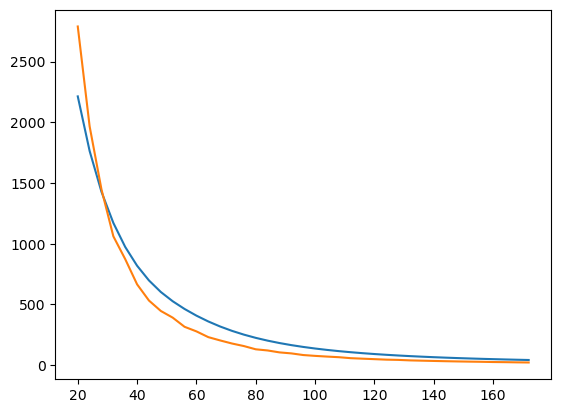

In [49]:
plt.plot(d[4:], np.diag(varcosmic_mono[4:, 4:]))
plt.plot(d[4:], np.diag(var_00_172[4:, 4:])/(2*np.pi**2))

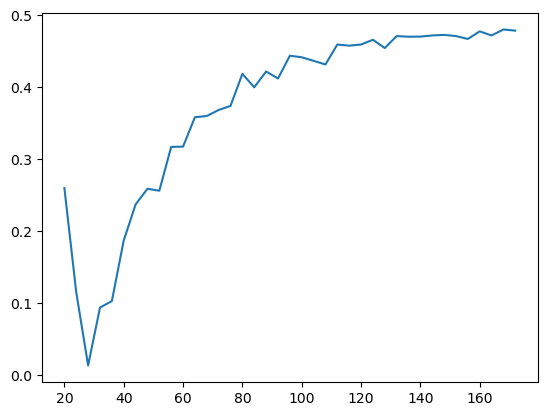

In [50]:
plt.plot(d[4:], np.abs((np.diag(var_00_172[4:, 4:])/(2*np.pi**2)-np.diag(varcosmic_mono[4:, 4:]))/np.diag(varcosmic_mono[4:, 4:])))

# Mixed terms

In [27]:
k, pk = np.loadtxt('Pkz0.0.dat', usecols=(0, 1), unpack=True)

# Get the logk-spacing
dlnk = np.log(k[1]/k[0])

N = k.size
print('Number of data points: '+str(N))

ell1 = 0
ell2 = 0
nu = 1.01

# Define the input 'kernel'. It has to be a matri: transform the pk to a diagonal matrix
pk1k2 = np.diag(k**3 * pk / dlnk)

Number of data points: 10000


In [28]:
# Define the class for spherical Bessel 

sph_bessel = two_sph_bessel(k, k, pk1k2, nu1=nu, nu2=nu,  N_extrap_low=0, N_extrap_high=0, c_window_width=0.25, N_pad=0)

r1, r2, Fr1Fr2 = sph_bessel.two_sph_bessel(ell1, ell2)

10000 10000
(10000, 10000)
10000 10000


In [29]:
# Drop results above 200 Mpc/h

criterion = r1 <= 200

d1 = r1[criterion]
d2 = r2[criterion]

mixvar_00 = Fr1Fr2[:len(d1), :len(d2)]

In [30]:
np.shape(mixvar_00)

(5000, 5000)

In [31]:
np.shape(Fr1Fr2)

(10000, 10000)

In [32]:
from scipy.interpolate import RectBivariateSpline

# Create an interpolation function
f = RectBivariateSpline(d1, d2, mixvar_00, kx=5, ky=5)

# Now you can call f with new r1 and r2 values to get an interpolated Fr1r2 value
r1_new = 20.  # replace with your desired r1 value
r2_new = 20.  # replace with your desired r2 value
Fr1r2_new = f(r1_new, r2_new)

In [33]:
Fr1r2_new

array([[4.06297415]])

In [34]:
d1[325]

5.1582701816003915

In [35]:
2 * mixvar_00[325, 325] / (2*np.pi**2)

5.62474710978955

In [36]:
d = np.arange(4, 175, 4)

d

array([  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,  52,
        56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100, 104,
       108, 112, 116, 120, 124, 128, 132, 136, 140, 144, 148, 152, 156,
       160, 164, 168, 172])

In [37]:
2 * f(20, 20) / (2*np.pi**2), 2 * f(4,4)/ (2*np.pi**2)

(array([[0.41166535]]), array([[8.58851279]]))

In [38]:
mixvar_00_172 = f(d, d)

In [39]:
np.shape(mixvar_00_172)

(43, 43)

In [40]:
np.diag(mixvar_00_172)

array([8.47652236e+01, 2.60318945e+01, 1.18386746e+01, 6.20378376e+00,
       4.06297415e+00, 2.75201494e+00, 1.93583183e+00, 1.40568594e+00,
       1.14253804e+00, 8.57534268e-01, 6.88377630e-01, 5.79060978e-01,
       4.98748351e-01, 4.10531265e-01, 3.61924815e-01, 3.03322442e-01,
       2.67957616e-01, 2.37930612e-01, 2.10443503e-01, 1.80200005e-01,
       1.67274929e-01, 1.47789750e-01, 1.35679959e-01, 1.20648360e-01,
       1.10848606e-01, 1.02296547e-01, 9.56068097e-02, 8.58923383e-02,
       7.95992225e-02, 7.43142949e-02, 6.89487044e-02, 6.51441761e-02,
       6.00811049e-02, 5.66890973e-02, 5.31476728e-02, 5.01094632e-02,
       4.74468798e-02, 4.48413410e-02, 4.27580369e-02, 4.01804753e-02,
       3.83825760e-02, 3.60895652e-02, 3.45837830e-02])

In [41]:
varmix_mono_ = np.loadtxt('varmix_mono_bare.dat', skiprows=3)

In [42]:
varmix_mono_[1,1], 2 * mixvar_00_172[0,0]/(2*np.pi**2)

(5.065468, 8.588512790294397)

In [43]:
varcosmic_mono_[0,:], varcosmic_mono_[:,0]

(array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.]))

In [44]:
varmix_mono = varmix_mono_[1:,1:]

np.shape(varmix_mono)

(43, 43)

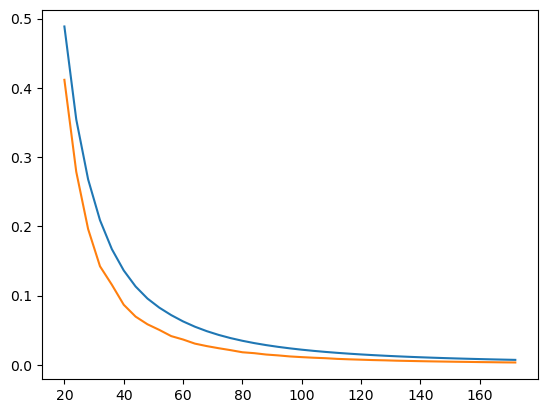

In [45]:
plt.plot(d[4:], np.diag(varmix_mono[4:, 4:]))
plt.plot(d[4:], 2*np.diag(mixvar_00_172[4:, 4:])/(2*np.pi**2))

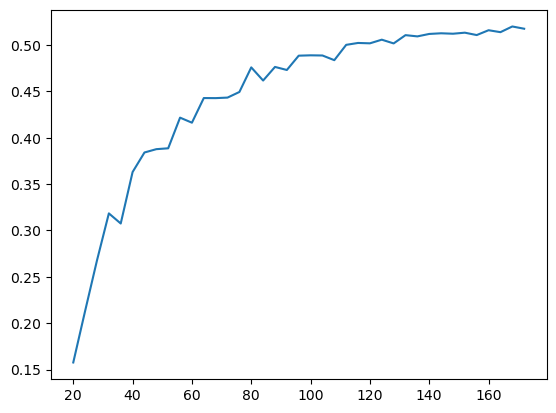

In [46]:
plt.plot(d[4:], np.abs((2*np.diag(mixvar_00_172[4:, 4:])/(2*np.pi**2)-np.diag(varmix_mono[4:, 4:]))/np.diag(varmix_mono[4:, 4:])))